In [138]:
import pandas as pd
import numpy as np

In [139]:
wages_df = pd.read_csv('../datasets/other/wages_final.csv')

In [140]:
andrew = pd.read_csv('../datasets/andrew.csv')
charlie = pd.read_csv('../datasets/charlie.csv')
frances = pd.read_csv('../datasets/frances.csv')
harvey = pd.read_csv('../datasets/harvey.csv')
ike = pd.read_csv('../datasets/ike.csv')
irene = pd.read_csv('../datasets/irene.csv')
irma = pd.read_csv('../datasets/irma.csv')
ivan = pd.read_csv('../datasets/ivan.csv')
katrina = pd.read_csv('../datasets/katrina.csv')
maria = pd.read_csv('../datasets/maria.csv')
matthew = pd.read_csv('../datasets/matthew.csv')
michael = pd.read_csv('../datasets/michael.csv')
rita = pd.read_csv('../datasets/rita.csv')
sandy = pd.read_csv('../datasets/sandy.csv')
wilma = pd.read_csv('../datasets/wilma.csv')

df = pd.concat([andrew, charlie, frances, harvey, ike, irene, irma, ivan, katrina, maria, matthew, michael, rita, sandy, wilma])

In [141]:
cost_df = pd.read_csv('../datasets/cost.csv')

In [142]:
new_df = pd.merge(df, cost_df, left_on=['geoid'], right_on=['name'], how='inner')

In [143]:
new_df.head()

,geoid,area_fips,qtrly_estabs_11_agriculture_forestry_fishing_and_hunting,avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting,month3_emplvl_11_agriculture_forestry_fishing_and_hunting,lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting,lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting,lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting,qtrly_estabs_1024_professional_and_business_services,avg_wkly_wage_1024_professional_and_business_services,...,lq_qtrly_estabs_48_49_transportation_and_warehousing.3,lq_month3_emplvl_48_49_transportation_and_warehousing.3,quarter.3,rank,name,states,year,category,damage,adjusted_damage
0,Charlie,12015,20.0,540.0,186.0,1.71,0.47,0.55,586.0,553.0,...,0.72,0.36,1.0,12,Charlie,FL,2004,4,16.0,21.1
1,Charlie,12095,233.0,462.0,3893.0,1.18,0.66,0.65,6805.0,791.0,...,1.23,0.00,1.0,12,Charlie,FL,2004,4,16.0,21.1
2,Charlie,12021,96.0,367.0,3696.0,0.98,0.78,3.34,2203.0,706.0,...,1.35,0.72,1.0,12,Charlie,FL,2004,4,16.0,21.1
3,Charlie,12027,112.0,0.0,0.0,0.00,16.42,0.00,48.0,617.0,...,1.26,0.00,1.0,12,Charlie,FL,2004,4,16.0,21.1
4,Charlie,12049,117.0,0.0,0.0,0.00,18.68,0.00,46.0,393.0,...,0.71,0.25,1.0,12,Charlie,FL,2004,4,16.0,21.1


In [144]:
new_df['damage_by_county'] = 0
for i in new_df['geoid'].unique():
    count = new_df[new_df['geoid'] == i].shape[0]
    new_df.loc[new_df['geoid'] == i,'damage_by_county'] = new_df.loc[new_df['geoid'] == i,'adjusted_damage'] * .8/count

In [145]:
new_df.columns[0:10]

Index(['geoid', 'area_fips',
       'qtrly_estabs_11_agriculture_forestry_fishing_and_hunting',
       'avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting',
       'month3_emplvl_11_agriculture_forestry_fishing_and_hunting',
       'lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting',
       'lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting',
       'lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting',
       'qtrly_estabs_1024_professional_and_business_services',
       'avg_wkly_wage_1024_professional_and_business_services'],
      dtype='object')

In [146]:
new_df = new_df[new_df['area_fips'].isin(wages['area_fips'])]

In [147]:
new_df.shape

(56, 788)

In [148]:
wages.shape

(56, 44)

In [149]:
n=sorted(list(new_df['area_fips'].unique()))

In [150]:
w=sorted(list(wages['area_fips'].unique()))

In [151]:
for i in range(12):
    print(n[i],w[i],i)
print(w[33])

12005 12005 0
12011 12011 1
12021 12021 2
12031 12031 3
12071 12071 4
12086 12086 5
12091 12091 6
12095 12095 7
12099 12099 8
12115 12115 9
22051 22051 10
22071 22071 11


IndexError: list index out of range

In [152]:
wages.shape,new_df.shape

((56, 44), (56, 788))

In [153]:
new_df=new_df[new_df['geoid']!='Andrew']
wages=wages[wages['area_fips']!=12033]

In [154]:
new_df.shape,wages.shape

((56, 788), (56, 44))

In [155]:
new_df.columns

Index(['geoid', 'area_fips',
       'qtrly_estabs_11_agriculture_forestry_fishing_and_hunting',
       'avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting',
       'month3_emplvl_11_agriculture_forestry_fishing_and_hunting',
       'lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting',
       'lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting',
       'lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting',
       'qtrly_estabs_1024_professional_and_business_services',
       'avg_wkly_wage_1024_professional_and_business_services',
       ...
       'lq_month3_emplvl_48_49_transportation_and_warehousing.3', 'quarter.3',
       'rank', 'name', 'states', 'year', 'category', 'damage',
       'adjusted_damage', 'damage_by_county'],
      dtype='object', length=788)

In [156]:
new_df = new_df.sort_values(by=['year','area_fips'])
wages = wages.sort_values(by=['year','area_fips'])

In [157]:
new_df.head(10)

,geoid,area_fips,qtrly_estabs_11_agriculture_forestry_fishing_and_hunting,avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting,month3_emplvl_11_agriculture_forestry_fishing_and_hunting,lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting,lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting,lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting,qtrly_estabs_1024_professional_and_business_services,avg_wkly_wage_1024_professional_and_business_services,...,lq_month3_emplvl_48_49_transportation_and_warehousing.3,quarter.3,rank,name,states,year,category,damage,adjusted_damage,damage_by_county
9,Frances,12011,139.0,404.0,902.0,1.01,0.21,0.14,13932.0,783.0,...,0.00,1.0,15,Frances,FL,2004,2,9.8,12.9,0.938182
2,Charlie,12021,96.0,367.0,3696.0,0.98,0.78,3.34,2203.0,706.0,...,0.72,1.0,12,Charlie,FL,2004,4,16.0,21.1,2.813333
10,Frances,12086,451.0,404.0,7541.0,0.98,0.47,0.81,16453.0,810.0,...,NaN,1.0,15,Frances,FL,2004,2,9.8,12.9,0.938182
1,Charlie,12095,233.0,462.0,3893.0,1.18,0.66,0.65,6805.0,791.0,...,0.00,1.0,12,Charlie,FL,2004,4,16.0,21.1,2.813333
7,Frances,12095,233.0,462.0,3893.0,1.18,0.66,0.65,6805.0,791.0,...,0.47,1.0,15,Frances,FL,2004,2,9.8,12.9,0.938182
64,Ivan,12095,233.0,462.0,3893.0,1.18,0.66,0.65,6805.0,791.0,...,0.43,1.0,8,Ivan,"AL, FL",2004,3,20.5,27.1,1.970909
8,Frances,12099,369.0,488.0,5513.0,1.18,0.72,1.15,10329.0,856.0,...,0.87,1.0,15,Frances,FL,2004,2,9.8,12.9,0.938182
62,Ivan,22051,19.0,309.0,80.0,0.88,0.12,0.04,2583.0,603.0,...,0.00,1.0,8,Ivan,"AL, FL",2004,3,20.5,27.1,1.970909
16,Frances,72127,33.0,0.0,0.0,0.00,0.21,0.00,2605.0,453.0,...,0.95,1.0,15,Frances,FL,2004,2,9.8,12.9,0.938182
115,Wilma,12011,130.0,436.0,922.0,0.92,0.19,0.15,14826.0,918.0,...,0.51,1.0,9,Wilma,FL,2005,3,19.0,24.3,2.777143


In [158]:
wages.head(10)

,year,quarter,area_fips,area_title,quarterly_establishments,month_3_employment,month_3_employment_percent_change_oty,month_3_employment_rank,average_weekly_wages,average_weekly_wages_percent_change_oty,...,quarter.3,area_fips.3,area_title.3,quarterly_establishments.3,month_3_employment.3,month_3_employment_percent_change_oty.3,month_3_employment_rank.3,average_weekly_wages.3,average_weekly_wages_percent_change_oty.3,average_weekly_wages_rank.3
45,2004,1,12011,"Broward, FL",57900,693700,0.8,163,707,5.8,...,4,12011,"Broward, FL",59200,716600,3.6,46,802,7.5,47
42,2004,1,12021,"Collier, FL",10500,126300,3.3,38,636,5.0,...,4,12021,"Collier, FL",10900,129500,5.0,17,741,5.3,159
46,2004,1,12086,"Miami-Dade, FL",81600,982900,0.9,154,729,5.2,...,4,12086,"Miami-Dade, FL",83200,1007100,2.4,95,822,6.3,105
28,2004,1,12095,"Orange, FL",30100,621100,3.1,46,688,5.0,...,4,12095,"Orange, FL",30800,645000,4.4,30,757,6.5,89
43,2004,1,12095,"Orange, FL",30100,621100,3.1,46,688,5.0,...,4,12095,"Orange, FL",30800,645000,4.4,30,757,6.5,89
47,2004,1,12095,"Orange, FL",30100,621100,3.1,46,688,5.0,...,4,12095,"Orange, FL",30800,645000,4.4,30,757,6.5,89
44,2004,1,12099,"Palm Beach, FL",43600,524300,2.0,80,728,2.2,...,4,12099,"Palm Beach, FL",44600,547500,4.7,23,815,4.8,193
27,2004,1,22051,"Jefferson, LA",13800,212600,0.0,224,604,3.4,...,4,22051,"Jefferson, LA",14000,215500,0.3,255,687,6.0,117
48,2004,1,72127,"San Juan, PR",12900,322800,1.7,93,487,6.3,...,4,72127,"San Juan, PR",13600,338000,1.0,203,535,4.3,227
23,2005,2,12011,"Broward, FL",61100,718100,2.5,87,743,5.1,...,1,12011,"Broward, FL",63300,753500,3.3,72,791,[ND],-


In [159]:
wages_clean=wages.reset_index(drop=True)
new_df_clean=new_df.reset_index(drop=True)

In [160]:
df_fin=pd.merge(new_df_clean,wages_clean,right_index=True,left_index=True)

In [161]:
df_fin

,geoid,area_fips_x,qtrly_estabs_11_agriculture_forestry_fishing_and_hunting,avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting,month3_emplvl_11_agriculture_forestry_fishing_and_hunting,lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting,lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting,lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting,qtrly_estabs_1024_professional_and_business_services,avg_wkly_wage_1024_professional_and_business_services,...,quarter.3_y,area_fips.3_y,area_title.3,quarterly_establishments.3,month_3_employment.3,month_3_employment_percent_change_oty.3,month_3_employment_rank.3,average_weekly_wages.3,average_weekly_wages_percent_change_oty.3,average_weekly_wages_rank.3
0,Frances,12011,139.0,404.0,902.0,1.01,0.21,0.14,13932.0,783.0,...,4,12011,"Broward, FL",59200,716600,3.6,46,802,7.5,47
1,Charlie,12021,96.0,367.0,3696.0,0.98,0.78,3.34,2203.0,706.0,...,4,12021,"Collier, FL",10900,129500,5.0,17,741,5.3,159
2,Frances,12086,451.0,404.0,7541.0,0.98,0.47,0.81,16453.0,810.0,...,4,12086,"Miami-Dade, FL",83200,1007100,2.4,95,822,6.3,105
3,Charlie,12095,233.0,462.0,3893.0,1.18,0.66,0.65,6805.0,791.0,...,4,12095,"Orange, FL",30800,645000,4.4,30,757,6.5,89
4,Frances,12095,233.0,462.0,3893.0,1.18,0.66,0.65,6805.0,791.0,...,4,12095,"Orange, FL",30800,645000,4.4,30,757,6.5,89
5,Ivan,12095,233.0,462.0,3893.0,1.18,0.66,0.65,6805.0,791.0,...,4,12095,"Orange, FL",30800,645000,4.4,30,757,6.5,89
6,Frances,12099,369.0,488.0,5513.0,1.18,0.72,1.15,10329.0,856.0,...,4,12099,"Palm Beach, FL",44600,547500,4.7,23,815,4.8,193
7,Ivan,22051,19.0,309.0,80.0,0.88,0.12,0.04,2583.0,603.0,...,4,22051,"Jefferson, LA",14000,215500,0.3,255,687,6.0,117
8,Frances,72127,33.0,0.0,0.0,0.00,0.21,0.00,2605.0,453.0,...,4,72127,"San Juan, PR",13600,338000,1.0,203,535,4.3,227
9,Wilma,12011,130.0,436.0,922.0,0.92,0.19,0.15,14826.0,918.0,...,1,12011,"Broward, FL",63300,753500,3.3,72,791,[ND],-


In [162]:
df_fin.shape

(56, 832)

In [163]:
df_fin.to_csv('../datasets/MergedData.csv',index=False)

In [164]:
df = pd.read_csv('../datasets/MergedData.csv')

In [165]:
df.head()

,geoid,area_fips_x,qtrly_estabs_11_agriculture_forestry_fishing_and_hunting,avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting,month3_emplvl_11_agriculture_forestry_fishing_and_hunting,lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting,lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting,lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting,qtrly_estabs_1024_professional_and_business_services,avg_wkly_wage_1024_professional_and_business_services,...,quarter.3_y,area_fips.3_y,area_title.3,quarterly_establishments.3,month_3_employment.3,month_3_employment_percent_change_oty.3,month_3_employment_rank.3,average_weekly_wages.3,average_weekly_wages_percent_change_oty.3,average_weekly_wages_rank.3
0,Frances,12011,139.0,404.0,902.0,1.01,0.21,0.14,13932.0,783.0,...,4,12011,"Broward, FL",59200,716600,3.6,46,802,7.5,47
1,Charlie,12021,96.0,367.0,3696.0,0.98,0.78,3.34,2203.0,706.0,...,4,12021,"Collier, FL",10900,129500,5.0,17,741,5.3,159
2,Frances,12086,451.0,404.0,7541.0,0.98,0.47,0.81,16453.0,810.0,...,4,12086,"Miami-Dade, FL",83200,1007100,2.4,95,822,6.3,105
3,Charlie,12095,233.0,462.0,3893.0,1.18,0.66,0.65,6805.0,791.0,...,4,12095,"Orange, FL",30800,645000,4.4,30,757,6.5,89
4,Frances,12095,233.0,462.0,3893.0,1.18,0.66,0.65,6805.0,791.0,...,4,12095,"Orange, FL",30800,645000,4.4,30,757,6.5,89


In [133]:
group = df.groupby('geoid', axis=1)

In [134]:
df.drop(columns=['geoid.1', 'geoid.2', 'geoid.3'], inplace=True)

In [135]:
df.drop(columns=['area_fips.1_x', 'area_fips.2_x', 'area_fips.3_x'], inplace=True)

In [136]:
# df.drop([col for col in df.columns if 'lq' not in col],axis = 1,inplace = True)

In [109]:
df.rename(columns={'lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting': 'affh_wage_q0',
                          'lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting':'affh_estab_q0',
                          'lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting':'affh_employ_q0',
                          'lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting.1': 'affh_wage_q1',
                          'lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting.1':'affh_estab_q1',
                          'lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting.1':'affh_employ_q1',
                          'lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting.2': 'affh_wage_q2',
                          'lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting.2':'affh_estab_q2',
                          'lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting.2':'affh_employ_q2',
                          'lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting.3': 'affh_wage_q3',
                          'lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting.3':'affh_estab_q3',
                          'lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting.3':'affh_employ_q3'}, 
                 inplace=True)

In [137]:
for i in df.columns:
    print(i)

geoid
area_fips_x
qtrly_estabs_11_agriculture_forestry_fishing_and_hunting
avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting
month3_emplvl_11_agriculture_forestry_fishing_and_hunting
lq_avg_wkly_wage_11_agriculture_forestry_fishing_and_hunting
lq_qtrly_estabs_11_agriculture_forestry_fishing_and_hunting
lq_month3_emplvl_11_agriculture_forestry_fishing_and_hunting
qtrly_estabs_1024_professional_and_business_services
avg_wkly_wage_1024_professional_and_business_services
month3_emplvl_1024_professional_and_business_services
lq_avg_wkly_wage_1024_professional_and_business_services
lq_qtrly_estabs_1024_professional_and_business_services
lq_month3_emplvl_1024_professional_and_business_services
qtrly_estabs_61_educational_services
avg_wkly_wage_61_educational_services
month3_emplvl_61_educational_services
lq_avg_wkly_wage_61_educational_services
lq_qtrly_estabs_61_educational_services
lq_month3_emplvl_61_educational_services
qtrly_estabs_53_real_estate_and_rental_and_leasing
avg_wkly_w

In [72]:
import seaborn as sns

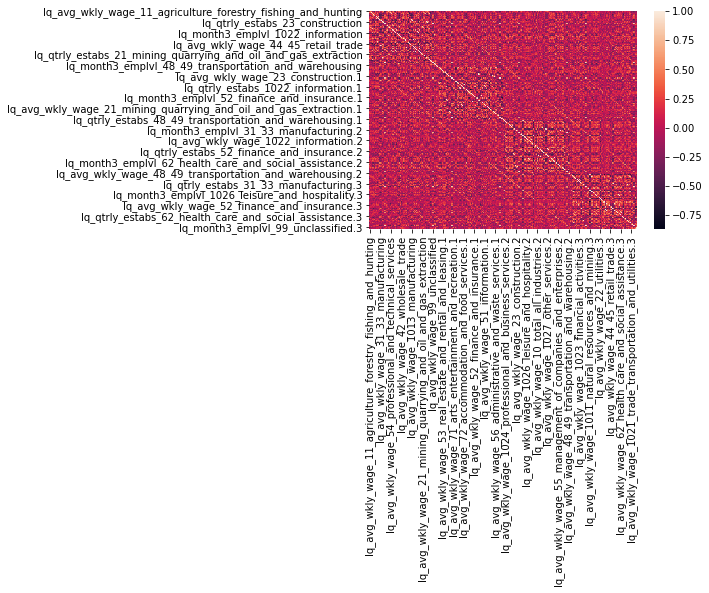

In [73]:
sns.heatmap(df.corr())

In [ ]:
df = subjective_cols.drop(columns= ["subjective_attractiveness",
                                            "subjective_sincerity",
                                            "subjective_intelligence",
                                            "subjective_fun",
                                            "subjective_ambition"])